In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [3]:
df = pd.read_csv('data.csv')

### Visualização

In [4]:
df['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [5]:
df.sample()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3173,3173,220655,Valdivia,23,Brazil,73,78,Al Ittihad,5500000,18000,...,66.0,60.0,34.0,35.0,14.0,16.0,16.0,15.0,15.0,NaN


# Estatísticas básicas

Distribuição do pé preferido dos jogadores

4211
13948


<BarContainer object of 2 artists>

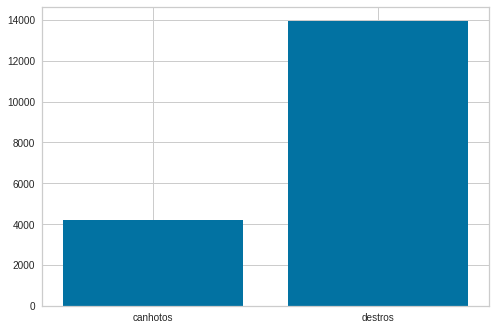

In [6]:
canhotos = df['Preferred Foot'].tolist().count('Left')
print(canhotos)
destros = df['Preferred Foot'].tolist().count('Right')
print(destros)
plt.bar(['canhotos', 'destros'], [canhotos, destros])

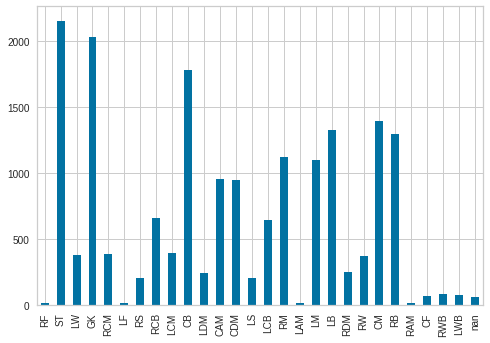

In [7]:
posicoes = df['Position'].unique()
posicoes_cnt = []
for i in posicoes:
    posicoes_cnt.append(df['Position'].tolist().count(i))

df_pos = pd.Series(posicoes_cnt, posicoes)
df_pos.plot.bar()

In [8]:
df.loc[df['Height'] == 182.88]

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000,380000,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
10,10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000,205000,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
11,11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500000,355000,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
39,39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000,165000,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,18139,243099,Liu Bin,20,China PR,49,66,Chongqing Dangdai Lifan FC SWM Team,60000,1000,...,37.0,62.0,40.0,49.0,8.0,12.0,8.0,12.0,5.0,167000.0
18141,18141,242849,Chen Yajun,19,China PR,49,67,Guangzhou R&F; FC,60000,1000,...,44.0,56.0,47.0,48.0,11.0,8.0,7.0,6.0,9.0,167000.0
18163,18163,242852,Wang Xin,20,China PR,48,58,Guangzhou R&F; FC,40000,1000,...,33.0,49.0,43.0,43.0,10.0,12.0,8.0,8.0,12.0,94000.0
18167,18167,243112,Wu Lei,21,China PR,48,58,Tianjin Quanjian FC,40000,2000,...,39.0,52.0,40.0,49.0,8.0,15.0,11.0,8.0,5.0,94000.0


In [9]:
def convertendo_altura(altura):
    if altura == 'nan':
        return 6 * 30.48
    altura = str(altura)
    out = altura.split("'")
    if len(out) != 2:
        return float(altura)
    #print(altura)
    out = float(out[0])*30.48 + float(out[1])*2.54
    return float(out)
#df['Height'].fillna(6*30.48, inplace = True)
df['Height'] = df['Height'].apply(lambda x: convertendo_altura(x))
#df['Height']

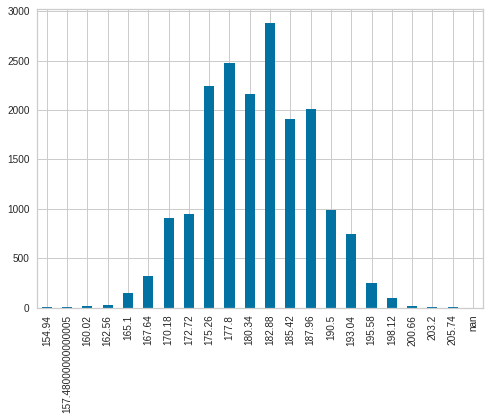

In [10]:
#fazer a distribuicao da altura dos jogadores e depois a media das alturas de acordo com cada posicao
altura = df['Height'].unique()
altura.sort()
altura_cnt = []
for i in altura:
    altura_cnt.append(df['Height'].tolist().count(i))

df_altura = pd.Series(altura_cnt, altura)
df_altura.plot.bar()

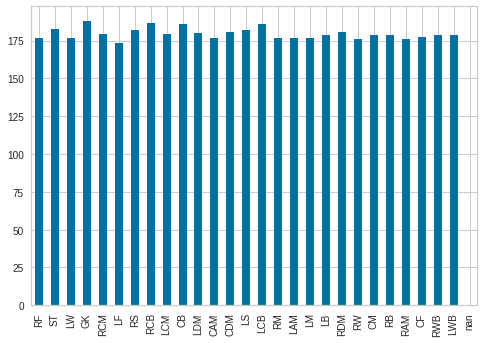

In [11]:
avg_alt_pos = []
#print(posicoes)
#mudar o range do y aqui, por de 160: 185 por ai
for i in posicoes:
    avg_alt_pos.append(df[df['Position'] == i]['Height'].mean())
df_avg_alt_pos = pd.Series(avg_alt_pos, posicoes)
df_avg_alt_pos.plot.bar()  

In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKRefl

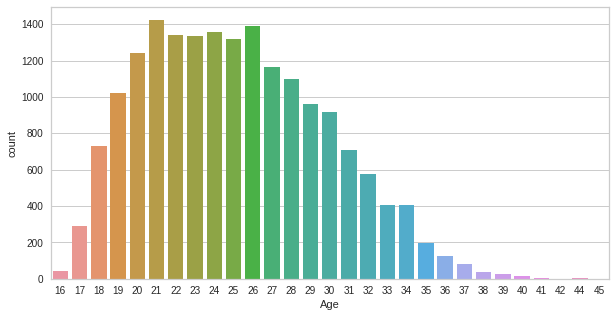

In [13]:
import seaborn as sns
#distribuiçao de idade
plt.figure(figsize=(10, 5))
age_distrib = sns.countplot(x="Age", data=df)
plt.show(age_distrib)

/home/wmaciel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/wmaciel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


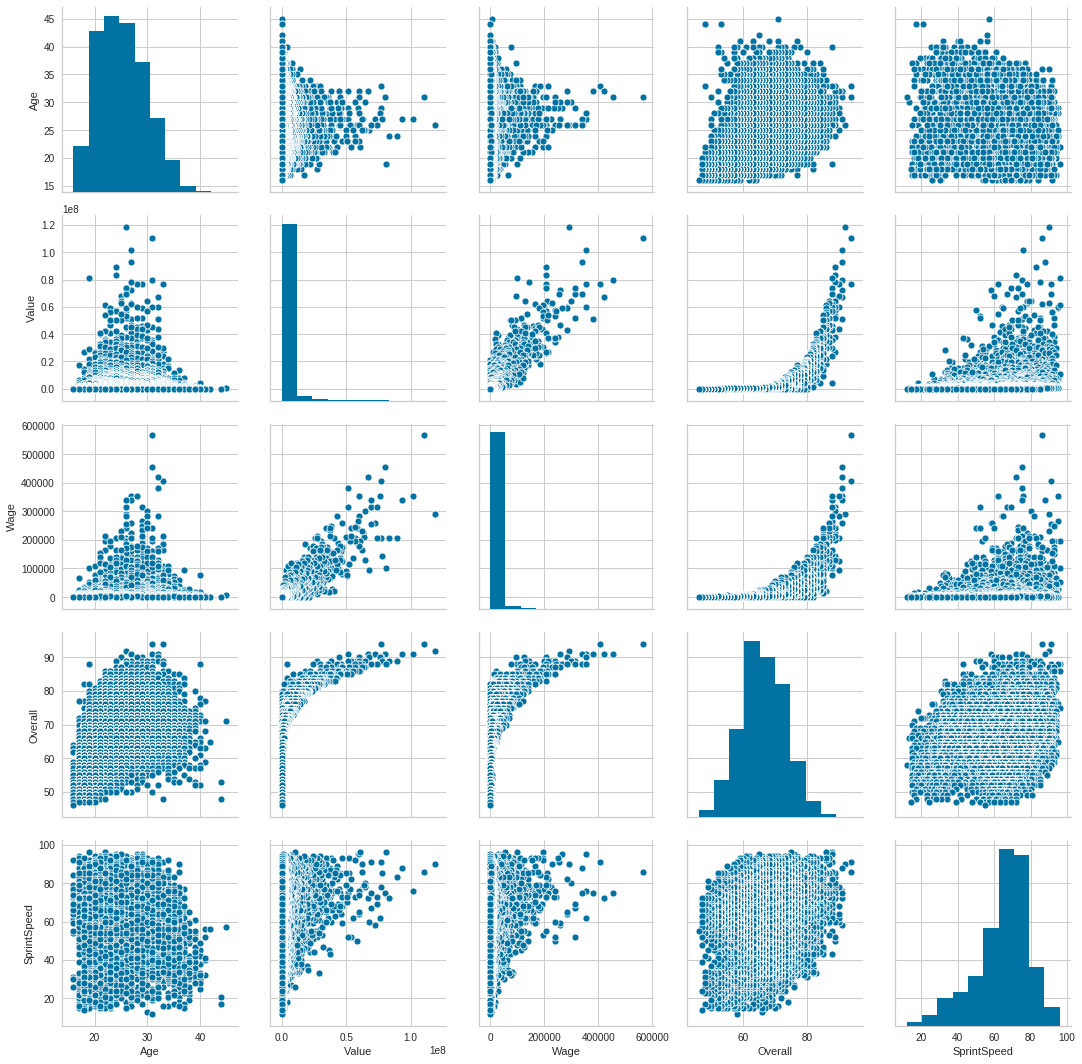

In [14]:
df["Normalized Value"] = (df["Value"] - df["Value"].mean()) / df["Value"].std()
df["Normalized Wage"] = (df["Wage"] - df["Wage"].mean()) / df["Wage"].std()
pairplt = sns.pairplot(data=df[['Age', 'Value', 'Wage', 'Overall', 'SprintSpeed']], height=3)
#, 'Dribbling', 'Stamina', 'Strength']                               
plt.show(pairplt)

In [15]:
#distribuiçao de paises (top 5 & outros paises)

countries = df.groupby("Nationality", as_index = False).count().sort_values("ID", ascending=False)

countries = countries[["Nationality", "ID"]]

countries = countries.rename(columns={"Nationality": "Nationality", "ID":"Count"})

total = countries["Count"].sum()

countries["Percentages"] = countries["Count"]/total

countries

,Nationality,Count,Percentages
46,England,1662,0.091284
59,Germany,1198,0.065799
139,Spain,1072,0.058878
6,Argentina,937,0.051464
55,France,914,0.050200
20,Brazil,827,0.045422
78,Italy,702,0.038557
31,Colombia,618,0.033943
81,Japan,478,0.026254
108,Netherlands,453,0.024881


### Parte não-trivial
Dado um orçamento, qual o melhor time possível?

### Real Madrid vs Barcelona

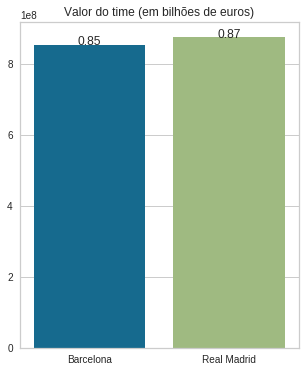

In [15]:
#comparação do valor dos times

real = df[df['Club'] == 'Real Madrid']
barca = df[df['Club'] == 'FC Barcelona']

team_value_real = real['Value'].sum()
team_value_barca = barca['Value'].sum()

x = ['Barcelona', 'Real Madrid']
y = [team_value_barca, team_value_real]

plt.figure(figsize=(5, 6))
plt.title("Valor do time (em bilhões de euros)")
ax = sns.barplot(x, y)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/1e9),
            ha="center")

plt.show(ax)
#porcentagem por país
#comparaçao do overrall rating
#comparaçao de salarios
#comparaçao de 'international reputation'

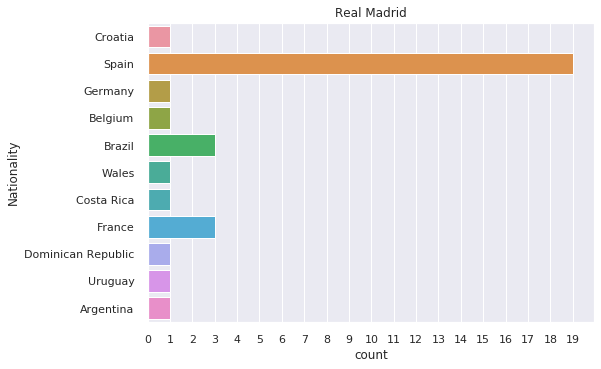

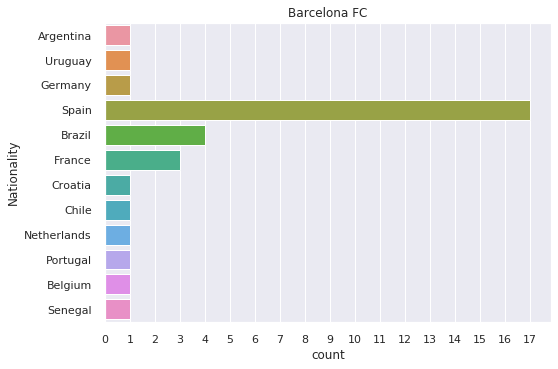

In [16]:
sns.set()
#plt.figure(figsize=(10,5))
plt.title("Real Madrid")
plt.xticks(np.arange(0, 21))
real_nation = sns.countplot(y='Nationality', data=real)
plt.show(real_nation)

#plt.figure(figsize=(10,5))
plt.title("Barcelona FC")
plt.xticks(np.arange(0, 21))
barca_nation = sns.countplot(y='Nationality', data=barca)
plt.show(barca_nation)

### Atlético Mineiro vs Cruzeiro

In [17]:
atletico = df[df['Club'] == "Atlético Mineiro"]
cruzeiro = df[df['Club'] == "Cruzeiro"]

### Non Trivial Step

In [18]:
def melhor_time(df, tat):
    tat442 = ['GK', 'RB', 'CB', 'CB', 'LB' , 'RM' , 'CM' , 'CM', 'LM', 'ST', 'ST']
    tat433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'RM', 'CM', 'LM', 'LW', 'ST', 'RW']
    time = []
    if tat == 442:
        tat = tat442
    else:
        tat = tat433
    top_5_pos = []
    
    for pos in tat:
        temp = df.where(df['Position'] == pos).dropna(how = 'all')
        temp = temp.sort_values(by = 'Overall', ascending = False)
        temp = temp['Name'].tolist()
        top_5_pos.append(temp[:6])
    
    for i in range(len(top_5_pos)):
        j = 0
        while top_5_pos[i][j] in time:
            j+=1
        time.append(top_5_pos[i][j])
        
    return time

In [20]:
melhor_time(df,433)

['De Gea',
 'Marcelo',
 'D. Godín',
 'S. Umtiti',
 'Azpilicueta',
 'K. Mbappé',
 'Thiago',
 'P. Aubameyang',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernardo Silva']

In [23]:
teams = df[["Club", "Value", "Overall"]]
teams = teams.groupby("Club").mean()
teams = (teams - teams.mean()) / teams.std()
teams = teams.sort_values("Overall", ascending=False)

df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Normalized Value,Normalized Wage
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,19.319143,25.240300
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,13.331582,17.967338
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,20.749008,12.739897
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,12.437916,11.376216
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,17.799911,15.694537


In [25]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKRefl

In [ ]:
#TODO:

#consertar coluna de valor / salario

#agrupar tentar agrupar jogadores por posiçao:
# tirar goleiros e jogadores sem posiçao (nan)
# pegar apenas os atributos numericos
# normalizar
# dropar valor, salario e overall (para não deixar os dados disproporcionais)
# rodar varias iterações do kmeans com k variando e pegar a melhor
# rodar o kmeans com o k escolhido
# adicionar a coluna cluster no dataframe original
# plotar (top 10 de cada cluster) e analisar os clusters (esperado é separar os jogadores por posiçao)

### K elbow

In [27]:
DEF = ['RB','CB','LB','SW','RWB','LWB','RCB','LCB']
MID = ['CM','LOM','ROM','OM','LCM','LM','RM','LWM','RWM','RW','LW','RCM']
MIDA = ['CAM','LAM','RAM']
MIDD = ['CDM','LDM','RDM']
ATK = ['LF','RF', 'ST', 'CF', 'RS', 'LS']

HM = ['High/ Medium']
LH = ['Medium/ High']


In [45]:
attributes =  ['Name','Position','Crossing','ShortPassing', 'Dribbling', 'Curve','Weight',
        'Acceleration', 'Reactions', 'ShotPower','Work Rate',
        'Stamina', 'LongShots', 'Aggression',
       'Interceptions','Marking', 'StandingTackle']

df_cluster = df[attributes].dropna()
df_cluster = df_cluster[df_cluster['Position'] != 'GK']

##### Dividimos as posições em grupos

In [46]:

posit_group = []
for row in df_cluster['Position']:
   
    if(row in DEF ):
        posit_group.append('DEF')

    elif(row in MIDA ):
        posit_group.append('MID ATK')    

    elif(row in MIDD ):
        posit_group.append('MID DEF')    

    elif(row in MID):
        posit_group.append('MID')

    elif(row in ATK):
        posit_group.append('ATK')
    else:
        print(row)

df_cluster['Position Group'] = posit_group

##### Verificamos a melhor quantidade de clusters


A métrica escolhida foi a distorção que computa a distancia  ao quadrado de cada ponto em relação ao seu respectivo centroide 

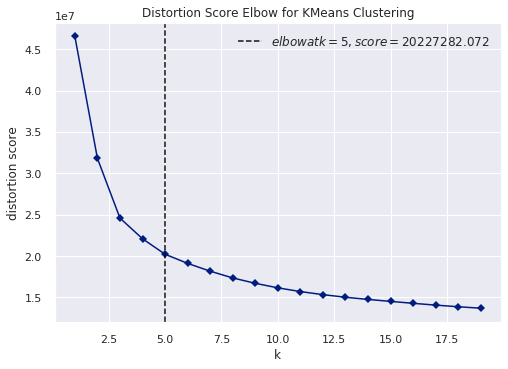

In [47]:
X = df_cluster[df_cluster.columns.difference(['Name','Position','Cluster','Work Rate','Position Group'])]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=False,metric='distortion' )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#####  Usando o melhor k

In [48]:
X = df_cluster[df_cluster.columns.difference(['Name','Position','Cluster','Work Rate','Position Group'])]
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusters = km.labels_.tolist()
df_cluster['Cluster'] = clusters

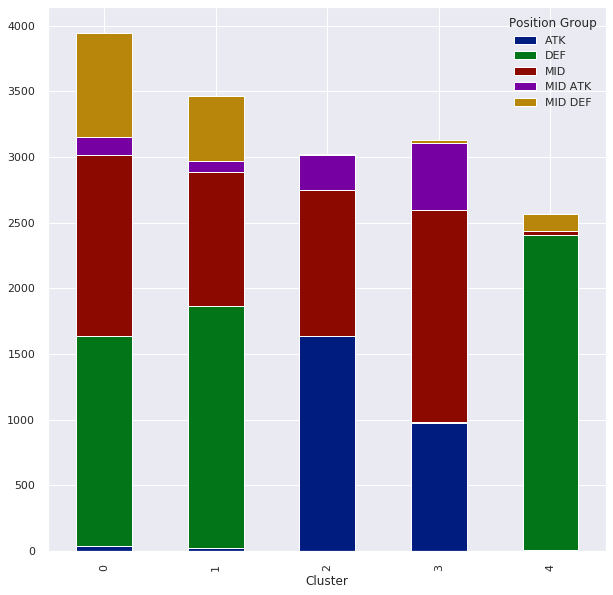

In [49]:
plt.style.use('seaborn-dark-palette')
df_cluster['Cluster'] = clusters
gp_clusters = df_cluster.groupby('Cluster')
a = df_cluster.groupby(["Cluster", "Position Group"]).size()
a.unstack(level=-1).plot(kind='bar',stacked=True, figsize = (10,10))
